In [1]:
import custom_functions as cf
import pm4py as pm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path to XES file
file_path = 'BPI2017Denied(3).xes'

# Read the XES file
log = pm.read_xes(file_path)

df = pd.DataFrame(log)

# Ensure necessary columns are present
required_columns = ['org:resource', 'concept:name']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"The event log does not contain necessary attributes: {', '.join(missing_columns)}.")
    exit()

# Convert timestamp to datetime if present
if 'time:timestamp' in df.columns:
    df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])


df


C:\Users\marij\Documents\Universiteit_local\Master_Year2\Process_Mining\test-cde\pythonProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 3093/3093 [00:10<00:00, 282.59it/s]


,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:RequestedAmount,case:ApplicationType,case:concept:name,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,start,Application,Application_1691306052,complete,2016-01-01 11:16:11.500000+00:00,Home improvement,10000.0,New credit,Application_1691306052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Created,User_1,A-Create-Application,Application,Application_1691306052,complete,2016-01-01 11:16:11.500000+00:00,Home improvement,10000.0,New credit,Application_1691306052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,statechange,User_1,A-Submitted,Application,ApplState_284636842,complete,2016-01-01 11:16:11.549000+00:00,Home improvement,10000.0,New credit,Application_1691306052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Created,User_1,W-Handle-leads-schedule,Workflow,Workitem_831373279,schedule,2016-01-01 11:16:11.740000+00:00,Home improvement,10000.0,New credit,Application_1691306052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deleted,User_1,W-Handle-leads-withdraw,Workflow,Workitem_1299098074,withdraw,2016-01-01 11:17:31.573000+00:00,Home improvement,10000.0,New credit,Application_1691306052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124861,Released,User_122,W-Validate-application-suspend,Workflow,Workitem_1784441909,suspend,2016-11-11 12:32:21.892000+00:00,Car,7500.0,New credit,Application_368167256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124862,statechange,User_75,A-Denied,Application,ApplState_1326365962,complete,2016-11-16 09:51:57.052000+00:00,Car,7500.0,New credit,Application_368167256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124863,statechange,User_75,O-Refused,Offer,OfferState_827208491,complete,2016-11-16 09:51:57.074000+00:00,Car,7500.0,New credit,Application_368167256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_861308087
124864,Deleted,User_75,W-Validate-application-ate-abort,Workflow,Workitem_87528267,ate_abort,2016-11-16 09:51:57.082000+00:00,Car,7500.0,New credit,Application_368167256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Generate the resource-activity matrix
counts = df.groupby(['org:resource', 'concept:name', 'case:concept:name']).size().reset_index(name='count')

# Now, for each resource and activity, compute the mean over cases
mean_counts = counts.groupby(['org:resource', 'concept:name'])['count'].mean().reset_index()

# Create the resource-activity matrix
resource_activity_matrix = mean_counts.pivot(index='org:resource', columns='concept:name', values='count').fillna(0)

# Visualize the resource-activity matrix
print("\nResource-Activity Matrix:")
resource_activity_matrix


Resource-Activity Matrix:


concept:name,A-Accepted,A-Complete,A-Concept,A-Create-Application,A-Denied,A-Incomplete,A-Submitted,A-Validating,O-Cancelled,O-Create-Offer,...,W-Shortened-completion-start,W-Shortened-completion-suspend,W-Validate-application-ate-abort,W-Validate-application-complete,W-Validate-application-resume,W-Validate-application-schedule,W-Validate-application-start,W-Validate-application-suspend,end,start
org:resource,,,,,,,,,,,,,,,,,,,,,
User_1,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,5.769231,0.0,1.0
User_10,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.068966,...,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.0,1.0
User_100,1.0,1.0,1.0,1.0,1.0,1.119048,0.0,1.0,0.0,1.000000,...,0.0,0.0,1.126506,1.000000,1.655172,1.0,1.000000,1.675676,1.0,1.0
User_101,0.0,0.0,0.0,0.0,1.0,1.105263,0.0,1.0,0.0,0.000000,...,0.0,0.0,1.118421,0.000000,1.600000,1.0,1.000000,1.375000,1.0,0.0
User_102,0.0,0.0,0.0,0.0,1.0,1.413793,0.0,1.0,0.0,0.000000,...,0.0,0.0,1.189655,1.357143,1.851485,1.0,1.000000,1.730769,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User_93,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,0.0,1.000000,...,0.0,0.0,1.000000,1.032258,1.689266,1.0,1.000000,1.740260,1.0,1.0
User_95,1.0,1.0,1.0,1.0,1.0,1.147059,0.0,1.0,0.0,1.000000,...,0.0,0.0,1.000000,1.130000,1.417671,1.0,1.000000,1.181818,1.0,1.0
User_96,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.066667,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


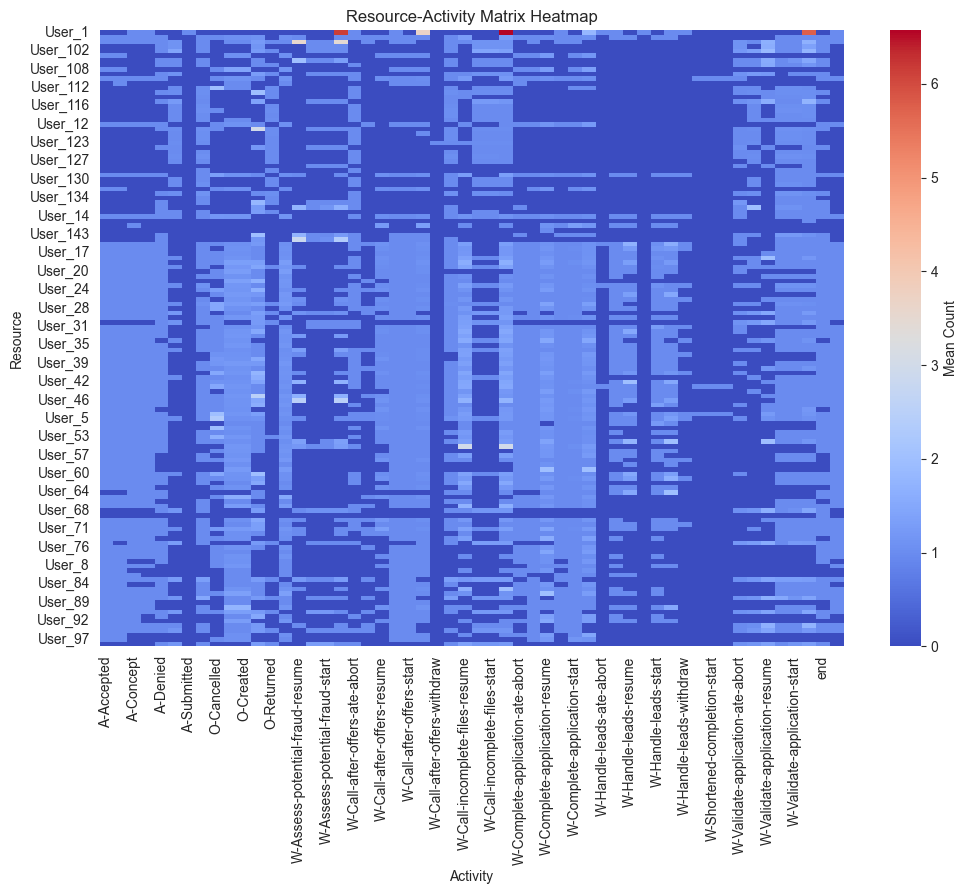

In [4]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(resource_activity_matrix, cmap="coolwarm", cbar_kws={'label': 'Mean Count'})

# Add labels and title
plt.xlabel("Activity")
plt.ylabel("Resource")
plt.title("Resource-Activity Matrix Heatmap")

# Display the heatmap
plt.show()


Social Network Edges (Resource Pairs with Similarity above Threshold):
User_10 -- User_13 (Similarity: 0.8785)
User_10 -- User_15 (Similarity: 0.7836)
User_10 -- User_16 (Similarity: 0.8087)
User_10 -- User_17 (Similarity: 0.8119)
User_10 -- User_19 (Similarity: 0.8424)
User_10 -- User_21 (Similarity: 0.7766)
User_10 -- User_24 (Similarity: 0.9810)
User_10 -- User_25 (Similarity: 0.7315)
User_10 -- User_26 (Similarity: 0.8347)
User_10 -- User_28 (Similarity: 0.9149)
User_10 -- User_3 (Similarity: 0.8590)
User_10 -- User_32 (Similarity: 0.8095)
User_10 -- User_33 (Similarity: 0.9196)
User_10 -- User_35 (Similarity: 0.8554)
User_10 -- User_36 (Similarity: 0.7992)
User_10 -- User_37 (Similarity: 0.7537)
User_10 -- User_38 (Similarity: 0.7444)
User_10 -- User_39 (Similarity: 0.8472)
User_10 -- User_4 (Similarity: 0.8657)
User_10 -- User_40 (Similarity: 0.7347)
User_10 -- User_42 (Similarity: 0.8711)
User_10 -- User_43 (Similarity: 0.7159)
User_10 -- User_44 (Similarity: 0.7491)
User_10 --

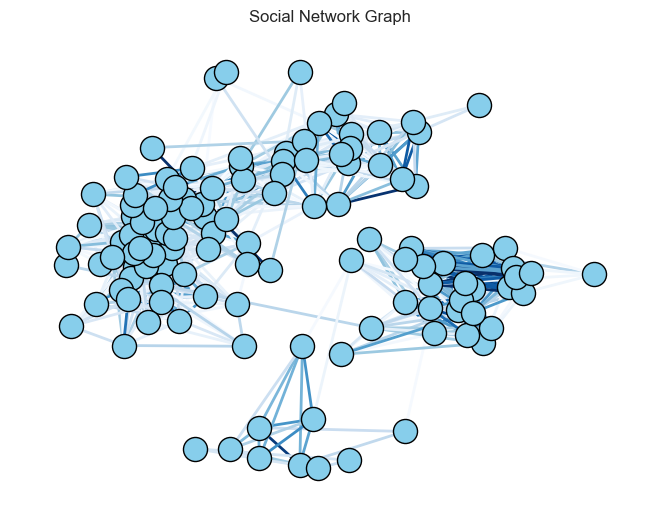

In [5]:
cf.generate_social_network(resource_activity_matrix)

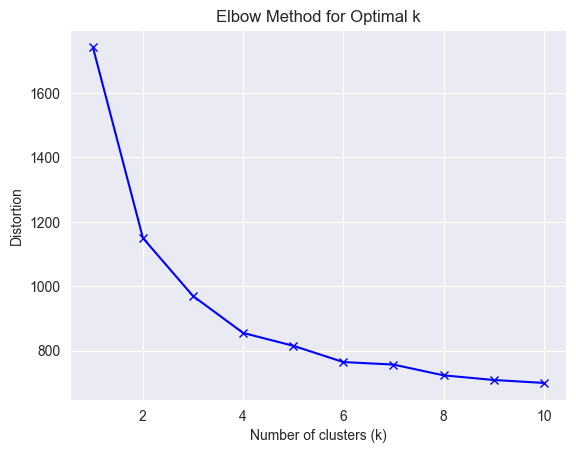

In [6]:
# Assume resource_activity_matrix is available
resource_profiles, resources = cf.get_resource_profiles(resource_activity_matrix)
cf.elbow_method(resource_profiles)

In [7]:
# Perform clustering and add clusters to data
resource_activity_matrix = cf.ask_for_k_or_clustering(resource_activity_matrix, resource_profiles, resources)



Clusters added to resource_activity_matrix.



Clusters added to resource_activity_matrix.


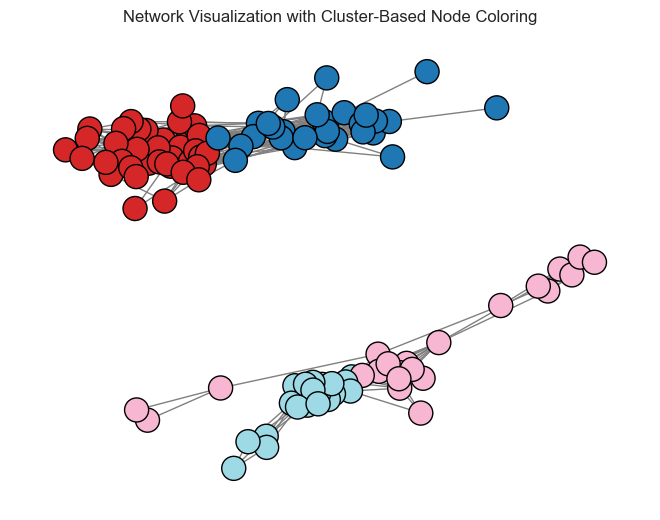

In [8]:
cf.visualize_network_with_clusters(resource_activity_matrix)